In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import sklearn.svm as svm
import sklearn.tree as tree

import tpot

import matplotlib.pyplot as plt

from tqdm import tqdm

import pandas as pd
import numpy as np 

c:\Users\Acer\miniconda3\envs\deep\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [43]:
# Preparing the dataset and creating the features and target arrays

n_sims = 10000

x = []
y = []

for i in tqdm(range(n_sims), desc='Carregando dados', ascii=True):
    data = np.load(f'input/data_{i+1}.npy')
    x.append(data[:, :2])
    y.append(data[0, 2])  # equivalente a data[:, 2:][0][0]

x = np.array(x)

x = x.reshape(x.shape[0], -1)

y = np.array(y)

norm = y.max()
# Normalização
y /= y.max()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

Carregando dados: 100%|##########| 10000/10000 [01:11<00:00, 140.43it/s]


In [ ]:
model = svm.NuSVR()

model.fit(x_train, y_train)


NuSVR()

In [24]:
reg = tpot.TPOTRegressor(max_time_mins=15)


In [45]:
reg.fit(x_train, y_train)

Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

In [27]:
y_pred = reg.predict(x_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)


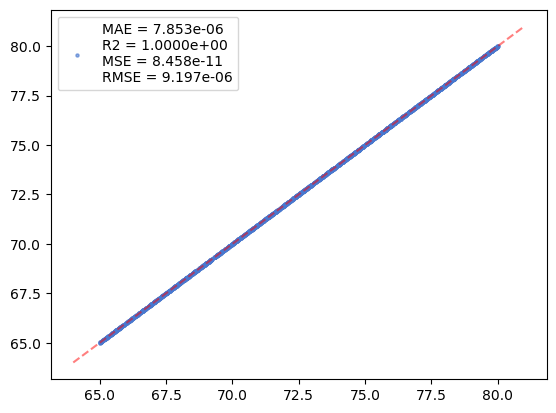

In [28]:
plt.style.use('seaborn-v0_8-muted')

linha = np.linspace(64, 81)


plt.scatter(y_pred*norm, y_test*norm, s=5, alpha=.6, label=f'MAE = {mae:.3e}\nR2 = {r2:.4e}\nMSE = {mse:.3e}\nRMSE = {rmse:.3e}')
plt.plot(linha, linha, alpha=.5, c='red', ls='--')

plt.legend()
# plt.savefig("imagens/metrics_h0_tree")

plt.show()

In [29]:
# forecasting "real" H(0)

real = np.load('input/data_real80.npy')
real = real[real[:, 1].argsort()]

real = real.reshape(1, 160)

In [39]:

final_real = reg.predict(real)
final_real*norm

array([67.44925412])

In [32]:
y_pred = model.predict(x_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)


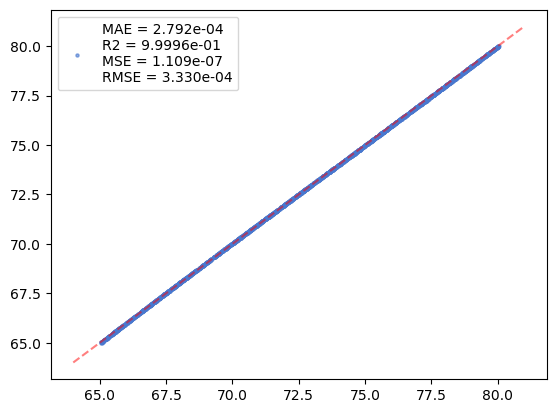

In [33]:
plt.style.use('seaborn-v0_8-muted')

linha = np.linspace(64, 81)


plt.scatter(y_pred*norm, y_test*norm, s=5, alpha=.6, label=f'MAE = {mae:.3e}\nR2 = {r2:.4e}\nMSE = {mse:.3e}\nRMSE = {rmse:.3e}')
plt.plot(linha, linha, alpha=.5, c='red', ls='--')

plt.legend()
plt.savefig("imagens/metrics_h0_tree")

plt.show()

In [34]:
# forecasting "real" H(0)

real = np.load('input/data_real80.npy')
real = real[real[:, 1].argsort()]

real = real.reshape(1, 160)

In [35]:

final_real = model.predict(real)

In [36]:
final_real*norm

array([67.43835969])

In [37]:
x_test.shape

(2500, 160)

In [38]:
import joblib


joblib.dump(model, "models/svm.pkl") 

['models/svm.pkl']